<a href="https://colab.research.google.com/github/LuFeMa33/Codes_FIAP/blob/main/Dengue_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando base de dados do DataSUS sobre a Dengue no Brasil

### Introdução

A dengue faz parte de um grupo de doenças denominadas arboviroses, que se caracterizam por serem causadas por vírus transmitidos por vetores artrópodes. No Brasil, o vetor da dengue é a fêmea do mosquito Aedes aegypti (significa "odioso do Egito"). Os vírus dengue (DENV) estão classificados cientificamente na família Flaviviridae e no gênero Orthoflavivirus. Até o momento são conhecidos quatro sorotipos – DENV-1, DENV-2, DENV-3 e DENV-4 –, que apresentam distintos materiais genéticos (genótipos) e linhagens.

Mosquito se alimentando
As evidências apontam que o mosquito tenha vindo nos navios que partiam da África com escravos. No Brasil, a primeira epidemia documentada clínica e laboratorialmente ocorreu em 1981-1982, em Boa Vista (RR), causada pelos sorotipos 1 e 4. Após quatro anos, em 1986, ocorreram epidemias atingindo o estado do Rio de Janeiro e algumas capitais da região Nordeste. Desde então, a dengue vem ocorrendo de forma continuada (endêmica), intercalando-se com a ocorrência de epidemias, geralmente associadas à introdução de novos sorotipos em áreas indenes (sem transmissão) e/ou alteração do sorotipo predominante, acompanhando a expansão do mosquito vetor.

Aspectos como a urbanização, o crescimento desordenado da população, o saneamento básico deficitário e os fatores climáticos mantêm as condições favoráveis para a presença do vetor, com reflexos na dinâmica de transmissão desses arbovírus. A dengue possui padrão sazonal, com aumento do número de casos e o risco para epidemias, principalmente entre os meses de outubro de um ano a maio do ano seguinte.

### Sinais e Sintomas

A dengue é uma doença febril aguda, sistêmica, dinâmica, debilitante e autolimitada. A maioria dos doentes se recupera, porém, parte deles podem progredir para formas graves, inclusive virem a óbito. A quase totalidade dos óbitos por dengue é evitável e depende, na maioria das vezes, da qualidade da assistência prestada e organização da rede de serviços de saúde.



### Links Ministério da Saúde

Base de dados do MS: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/denguebr.def

Documentos importantes: http://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/d0203.pdf



In [1]:
# manipulação de dados
import pandas as pd
import numpy as np

# visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# criação da variável que chama a base de dados
df_dengue = pd.read_excel('Base de Dados Dengue.xlsx')

In [3]:
# cinco primeiros registros
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3


In [4]:
# cinco ultimos registros
df_dengue.tail()

,municipio,uf,data_infeccoes,qtd_infeccoes
728767,BRASILIA,DF,2023-08-01,939
728768,BRASILIA,DF,2023-09-01,843
728769,BRASILIA,DF,2023-10-01,686
728770,BRASILIA,DF,2023-11-01,1300
728771,BRASILIA,DF,2023-12-01,5603


## Explorando o dataset

In [5]:
# quantidade de linhas (728772 linhas) e colunas (4 colunas)
df_dengue.shape

(728772, 4)

In [6]:
# criando visual da informação do shape
print(f'Tamanho do nosso Dataset: {df_dengue.shape}')

Tamanho do nosso Dataset: (728772, 4)


In [7]:
# verificando o tipo de objeto pandas
type(df_dengue)

pandas.core.frame.DataFrame

In [8]:
# verificando o tipo de dados presente em cada coluna
df_dengue.dtypes

,0
municipio,object
uf,object
data_infeccoes,datetime64[ns]
qtd_infeccoes,int64


In [9]:
# verificando se há valores nulos em cada coluna
df_dengue.isnull()

,municipio,uf,data_infeccoes,qtd_infeccoes
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
728767,False,False,False,False
728768,False,False,False,False
728769,False,False,False,False
728770,False,False,False,False


In [10]:
# verificando se existem valores nulos e se tiver, fará a soma dos valores ausentes
print(f'Quantidade de dados nulos: {df_dengue.isnull().sum().sum()}')

Quantidade de dados nulos: 0


In [11]:
# verificando o tipo de cada coluna e se tem valores nulos
df_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728772 entries, 0 to 728771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   municipio       728772 non-null  object        
 1   uf              728772 non-null  object        
 2   data_infeccoes  728772 non-null  datetime64[ns]
 3   qtd_infeccoes   728772 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.2+ MB


In [12]:
# verificando os valores únicos
df_dengue.nunique()

,0
municipio,5243
uf,27
data_infeccoes,132
qtd_infeccoes,1157


In [13]:
# Calculando a quantidade de pessoas que pegaram dengue por município por ano
# criar coluna de ano
# na primeira parte 'df_dengue = ['ano']' estamos criando uma coluna nova à partir da função de data da coluna 'data_infeccoes'. 'dt' é a chamada da função de ano do Pandas e após chamar, dizemos o que queremos ver da função data 'dt', que, neste caso é ano.

df_dengue ['ano'] = df_dengue['data_infeccoes'].dt.year

In [14]:
# verificando a nova coluna criada no passo acima
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes,ano
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34,2013
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44,2013
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15,2013
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4,2013
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3,2013


In [15]:
# criando um novo dataset agrupando por ano, município e uf realizando uma contagem por quantidade de infecções e resetando o índice
infeccoes_municipio = df_dengue.groupby(['ano', 'municipio', 'uf'])['qtd_infeccoes'].sum().reset_index()

In [16]:
# exibindo o agrupamento
infeccoes_municipio.head()

,ano,municipio,uf,qtd_infeccoes
0,2013,ABADIA DE GOIAS,GO,52
1,2013,ABADIA DOS DOURADOS,MG,0
2,2013,ABADIANIA,GO,37
3,2013,ABAETE,MG,486
4,2013,ABAETETUBA,PA,15


In [17]:
# exibindo informações do novo dataset após agrupamento
infeccoes_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60731 entries, 0 to 60730
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ano            60731 non-null  int32 
 1   municipio      60731 non-null  object
 2   uf             60731 non-null  object
 3   qtd_infeccoes  60731 non-null  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 1.6+ MB


In [18]:
infeccoes_estado = df_dengue.groupby(['ano', 'uf'])['qtd_infeccoes'].sum().reset_index()

In [19]:
# exibindo as informações truncadas, sem head()
infeccoes_estado

,ano,uf,qtd_infeccoes
0,2013,AC,1663
1,2013,AL,704
2,2013,AM,4327
3,2013,AP,546
4,2013,BA,13417
...,...,...,...
292,2023,RS,27389
293,2023,SC,77954
294,2023,SE,1749
295,2023,SP,198774


In [42]:
infeccoes_estado['Taxa de Infecção por 100.000 habitantes'] = infeccoes_estado['qtd_infeccoes'] / 100.000

In [45]:
infeccoes_estado

,ano,uf,qtd_infeccoes,Taxa de Infecção por 100.000 habitantes
0,2013,AC,1663,16.63
1,2013,AL,704,7.04
2,2013,AM,4327,43.27
3,2013,AP,546,5.46
4,2013,BA,13417,134.17
...,...,...,...,...
292,2023,RS,27389,273.89
293,2023,SC,77954,779.54
294,2023,SE,1749,17.49
295,2023,SP,198774,1987.74


In [51]:
# filtrando o ano de 2015
infeccoes_estado_2015 = infeccoes_estado[infeccoes_estado['ano'] == 2015]

In [52]:
infeccoes_estado_2015

,ano,uf,qtd_infeccoes,Taxa de Infecção por 100.000 habitantes
54,2015,AC,941,9.41
55,2015,AL,1928,19.28
56,2015,AM,1808,18.08
57,2015,AP,1680,16.80
58,2015,BA,7890,78.90
59,2015,CE,26859,268.59
60,2015,DF,7343,73.43
61,2015,ES,6318,63.18
62,2015,GO,36844,368.44
63,2015,MA,1407,14.07


/tmp/ipython-input-1126871279.py:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



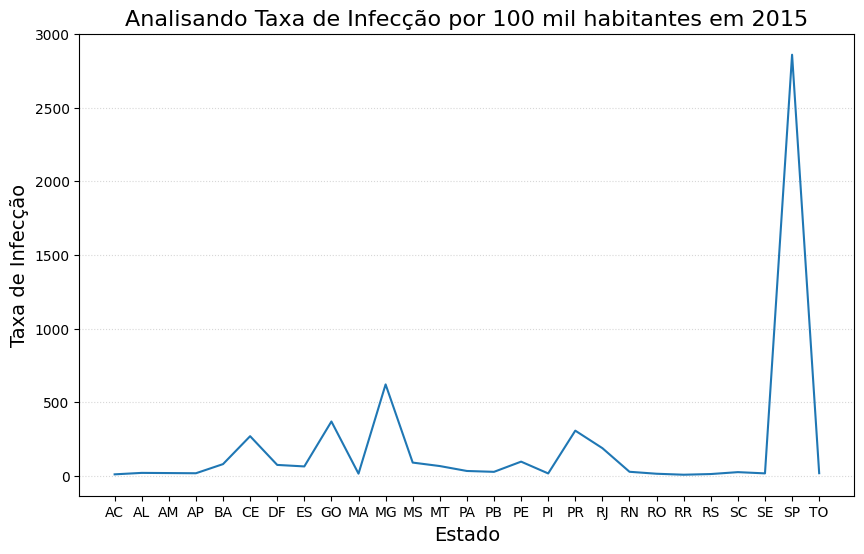

In [70]:
from re import X
# criando grafico de linha
plt.figure(figsize=(10,6))

sns.lineplot(data = infeccoes_estado_2015, x = 'uf', y = 'Taxa de Infecção por 100.000 habitantes')

plt.title('Analisando Taxa de Infecção por 100 mil habitantes em 2015', fontsize = 16)
plt.xlabel('Estado', fontsize = 14)
plt.ylabel('Taxa de Infecção', fontsize = 14)
plt.grid(axis= 'y', linestyle = ':', alpha = 0.5)
plt.show()

In [74]:
fig = px.line(infeccoes_estado_2015, y = 'Taxa de Infecção por 100.000 habitantes', x = 'uf', title = 'Taxa de Infecção por 100 mil habitantes em 2015')
fig.show()

In [20]:
# verificando a estatística do dataset
infeccoes_estado.describe()

,ano,qtd_infeccoes
count,297.000000,297.000000
mean,2018.000000,12872.474747
std,3.167615,31630.107741
min,2013.000000,0.000000
25%,2015.000000,780.000000
50%,2018.000000,2229.000000
75%,2021.000000,10098.000000
max,2023.000000,286000.000000


<Axes: ylabel='qtd_infeccoes'>

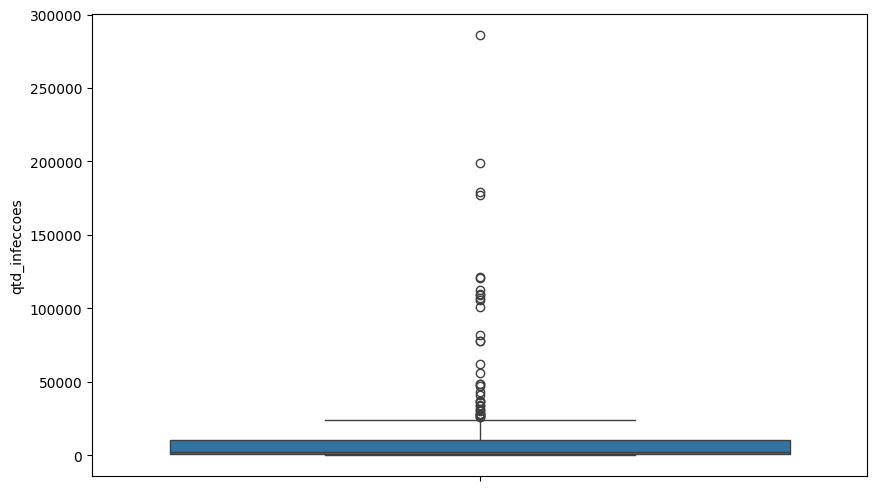

In [21]:
# criando boxplot apenas com o eixo y analisando a quantidade de infecções
plt.figure(figsize=(10,6))
sns.boxplot(data = infeccoes_estado, y = 'qtd_infeccoes')

/tmp/ipython-input-3375402306.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = infeccoes_estado, x = 'ano', y = 'qtd_infeccoes', palette='viridis')


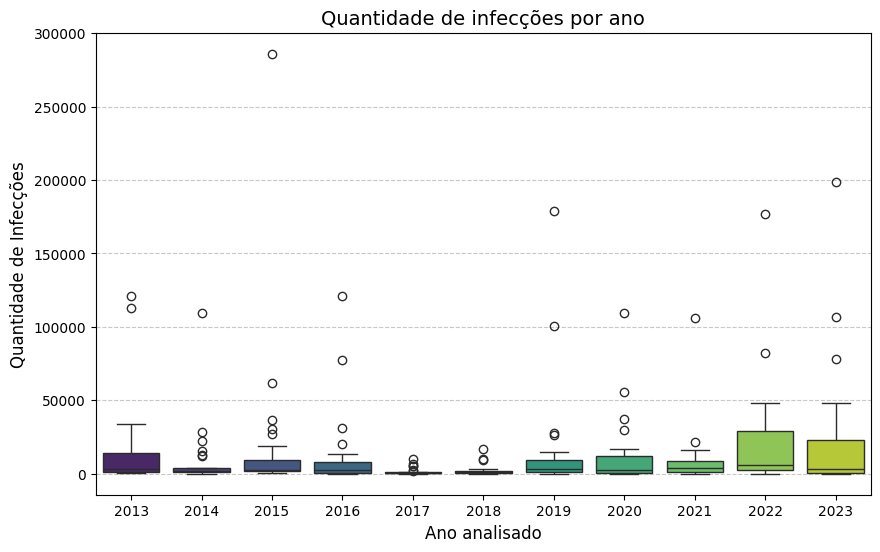

In [22]:
# criando gráfico boxplot comparando a quantidade de infecções por ano
plt.figure(figsize=(10,6))
sns.boxplot(data = infeccoes_estado, x = 'ano', y = 'qtd_infeccoes', palette='viridis')

# personalizando o gráfico
plt.title('Quantidade de infecções por ano', fontsize = 14,)
plt.xlabel('Ano analisado', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

In [23]:
# olhando os dados filtrando o ano de 2023
infeccoes_estado_2023 = infeccoes_estado[infeccoes_estado['ano'] == 2023]


In [24]:
infeccoes_estado_2023

,ano,uf,qtd_infeccoes
270,2023,AC,1781
271,2023,AL,473
272,2023,AM,3263
273,2023,AP,742
274,2023,BA,13249
275,2023,CE,7437
276,2023,DF,23710
277,2023,ES,0
278,2023,GO,21682
279,2023,MA,2428


In [25]:
# gerando as estatística do dataset filtrado com 2023
infeccoes_estado_2023.describe()

,ano,qtd_infeccoes
count,27.0,27.000000
mean,2023.0,22902.888889
std,0.0,43368.215001
min,2023.0,0.000000
25%,2023.0,744.000000
50%,2023.0,3263.000000
75%,2023.0,22696.000000
max,2023.0,198774.000000


/tmp/ipython-input-1912080691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = infeccoes_estado_2023, y = 'qtd_infeccoes', x = 'ano', palette='viridis')


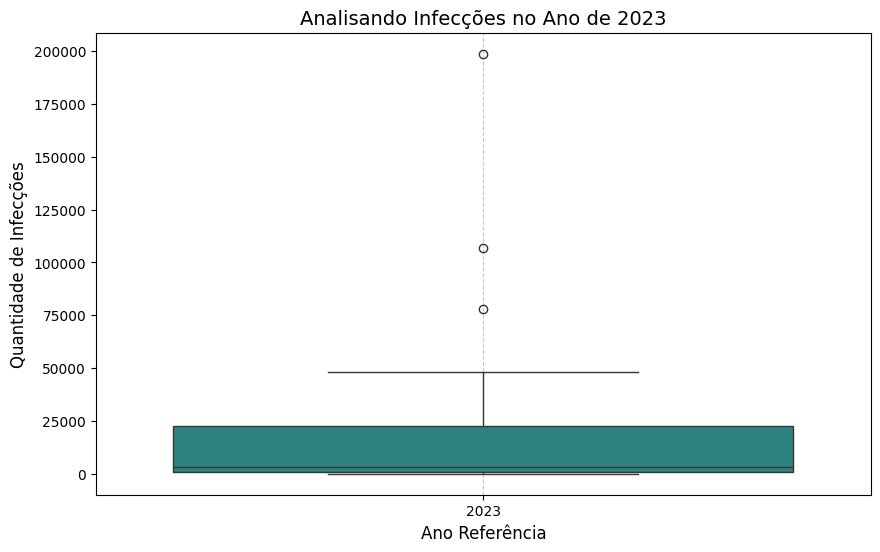

In [26]:
# gerando gráfico com o ano filtrando em 2023
plt.figure(figsize= (10,6))
sns.boxplot(data = infeccoes_estado_2023, y = 'qtd_infeccoes', x = 'ano', palette='viridis')
plt.title('Analisando Infecções no Ano de 2023', fontsize = 14)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.xlabel('Ano Referência', fontsize = 12)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

In [27]:
# criando boxplot com Plotly
fig = px.box(infeccoes_estado_2023, y = 'qtd_infeccoes', title = 'Boxplot de Infecções por Estado / 2023')
fig.show()

/tmp/ipython-input-382690707.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




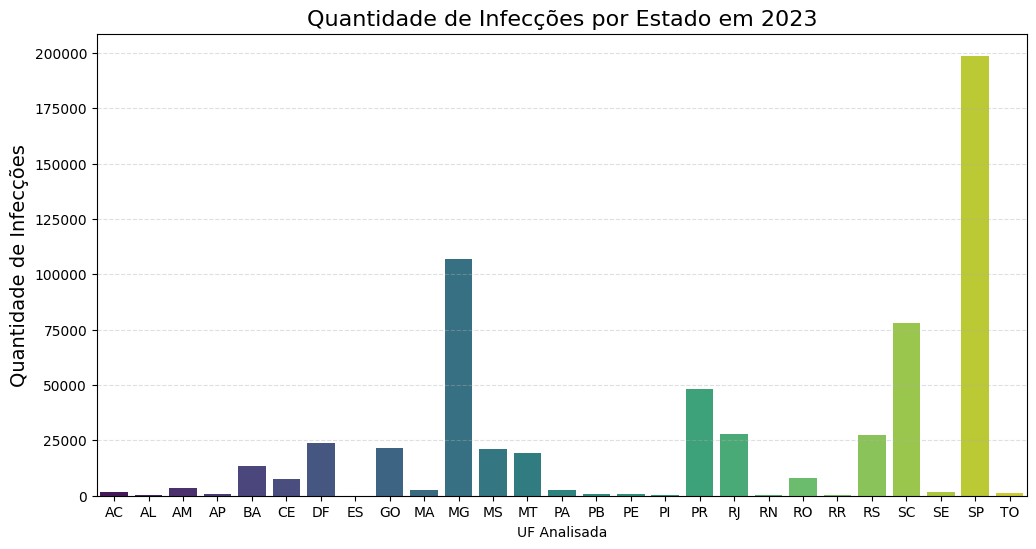

In [28]:
# utilizando gráfico de barras para comparar com a utilização do boxplot
plt.figure(figsize=(12,6))
sns.barplot(data = infeccoes_estado_2023, x = 'uf', y = 'qtd_infeccoes', palette = 'viridis')

# personalizando o gráfico de barras
plt.title('Quantidade de Infecções por Estado em 2023', fontsize = 16)
plt.ylabel('Quantidade de Infecções', fontsize = 14)
plt.xlabel('UF Analisada')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.4)
plt.show()

In [29]:
# ordenando os dados do maior para o menor infecções
infeccoes_2023 = infeccoes_estado_2023.sort_values(by='qtd_infeccoes', ascending = False)

In [30]:
infeccoes_2023

,ano,uf,qtd_infeccoes
295,2023,SP,198774
280,2023,MG,106923
293,2023,SC,77954
287,2023,PR,48328
288,2023,RJ,27905
292,2023,RS,27389
276,2023,DF,23710
278,2023,GO,21682
281,2023,MS,21098
282,2023,MT,19356


/tmp/ipython-input-2555090188.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




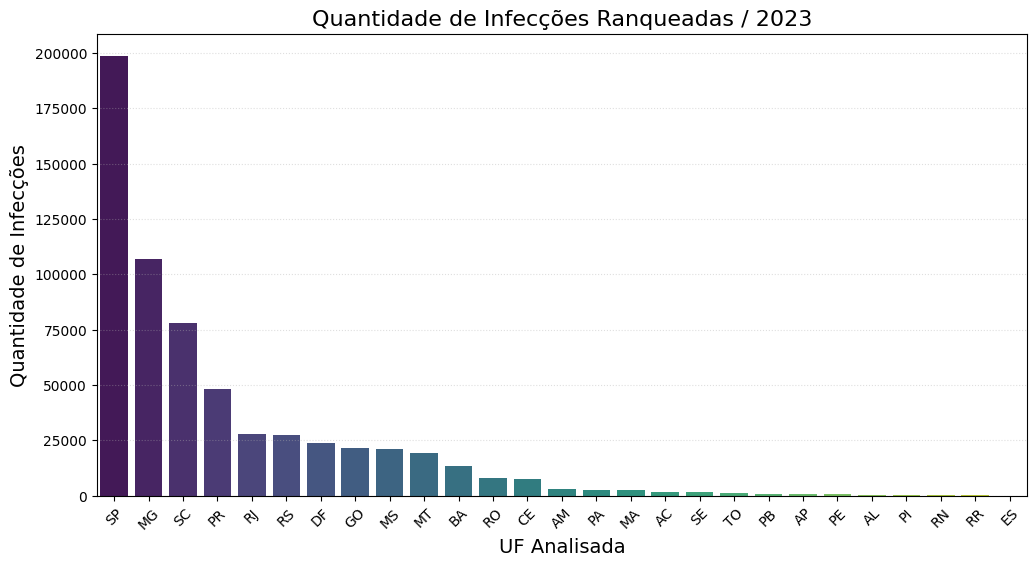

In [31]:
# criando novo gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(data = infeccoes_2023, x = 'uf', y = 'qtd_infeccoes', palette = 'viridis')

# formatando novo gráfico
plt.title('Quantidade de Infecções Ranqueadas / 2023', fontsize = 16)
plt.xlabel('UF Analisada', fontsize = 14)
plt.ylabel('Quantidade de Infecções', fontsize = 14)
plt.grid(axis= 'y', linestyle = ':', alpha = 0.4)
plt.xticks(rotation = 45)
plt.show()

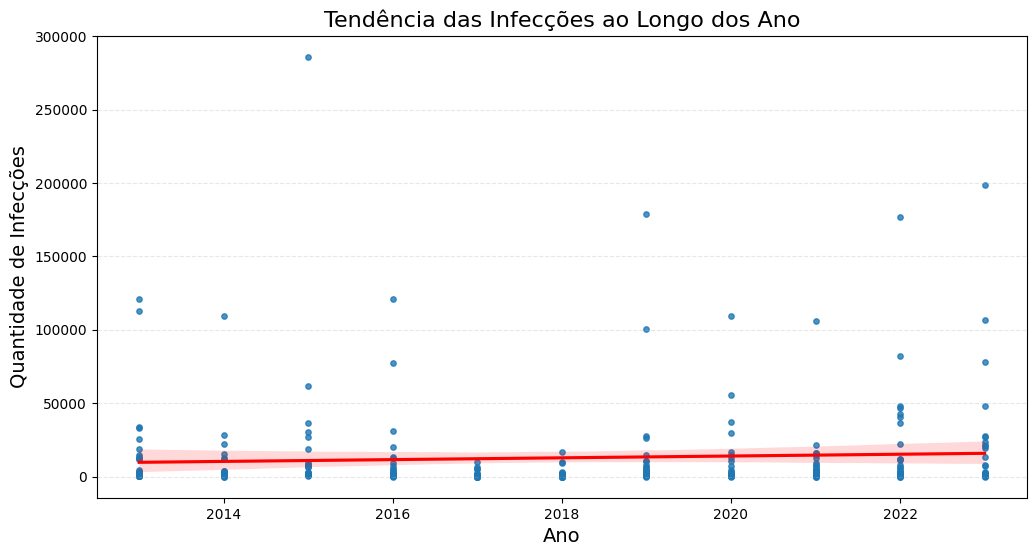

In [32]:
# criando gráfico de tendências
plt.figure(figsize=(12,6))
sns.regplot(data = infeccoes_estado, x = 'ano', y = 'qtd_infeccoes', scatter_kws={"s":15}, line_kws={"color":"red"})

# personalizando o gráfico
plt.title('Tendência das Infecções ao Longo dos Ano', fontsize = 16)
plt.xlabel('Ano', fontsize = 14)
plt.ylabel('Quantidade de Infecções', fontsize = 14)
plt.grid(axis='y',linestyle = '--', alpha = 0.3)
plt.show()